In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

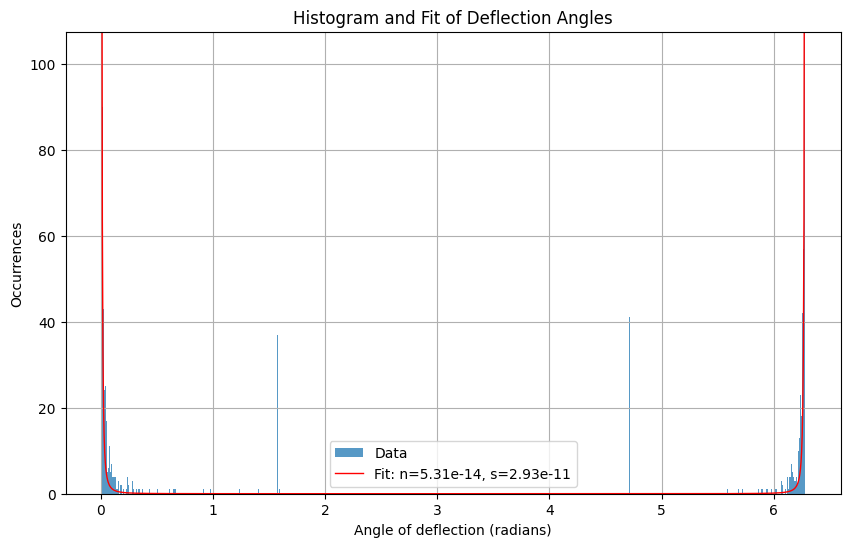

In [7]:
##FITTING DATA WITH THE FISRT GAUSSIAN FUNCTION, PARAMETERS N AND S
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# Define the new fit function
def fit_gaussian_first(x, n, s):
    return (n / (2 * np.sqrt(2*np.pi) * s)) * np.exp(-((n**2) * (1 / np.tan(x / 2))**2) / (2 * s**2)) * (1 / np.sin(x / 2)**2)

# Load data from file
data = np.loadtxt('angulars.txt')

# Define histogram parameters
bins = 1200
range_min, range_max = 0, 2 * np.pi

# Create histogram
hist, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial parameter values for fitting
initial_params = [2.25E-14, 1.44E-10]  # Example initial values for n and s

# Fit the histogram data
popt, pcov = curve_fit(fit_gaussian_first, bin_centers, hist, p0=initial_params)
fitted_n, fitted_s = popt

# Calculate expected values and normalize them
expected_values = fit_gaussian_first(bin_centers, fitted_n, fitted_s)
expected_values *= sum(hist) / sum(expected_values)  # Normalize to match the sum of observed values

# Calculate reduced chi-squared
chi2, p = chisquare(hist, f_exp=expected_values)
reduced_chi2 = chi2 / (len(hist) - 2)  # Adjust degrees of freedom

# Plot histogram and fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, range=(range_min, range_max), label='Data', alpha=0.75)
plt.plot(bin_centers, expected_values, 'r-', label='Fit: n=%.2e, s=%.2e' % (fitted_n, fitted_s), linewidth=1)

# Add reduced chi-squared to the plot
plt.legend(loc='best')
plt.xlabel('Angle of deflection (radians)')
plt.ylabel('Occurrences')
plt.title('Histogram and Fit of Deflection Angles')
#plt.text(1.5, max(hist) * 0.8, 'Reduced Chi-squared: %.2f' % reduced_chi2, fontsize=12, color='red')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, max(hist) * 0.2)  # Adjust the factor 0.2 as needed to show less of the y-axis

# Show plot
plt.show()


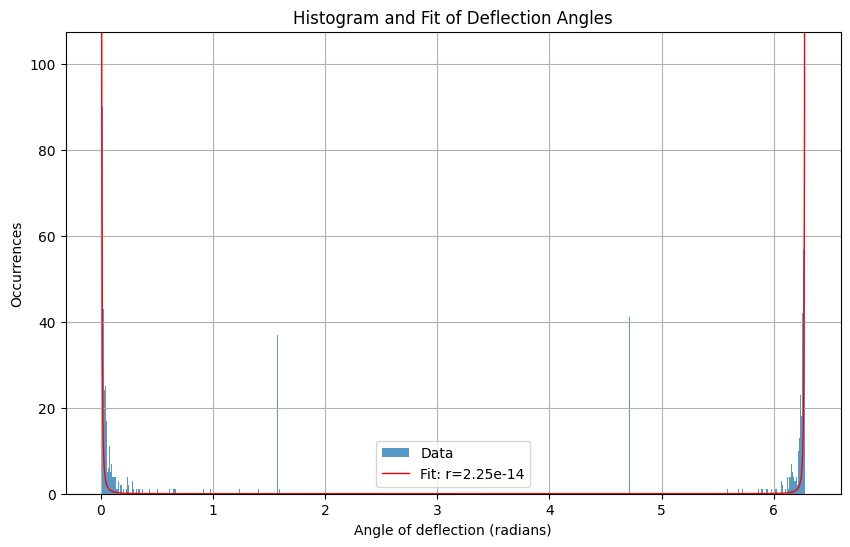

In [8]:
### FIT WITH THE SECON GAUSSAIN FUNCTION WITH PARAMETER R 
# Define the new fit function
def fit_gaussian_second(x, r):
    return (r / (2 * np.sqrt(2 * np.pi))) * np.exp(-((r**2) * (1 / np.tan(x / 2))**2) / 2) * (1 / np.sin(x / 2)**2)

# Load data from file
try:
    data = np.loadtxt('angulars.txt')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Define histogram parameters
bins = 1200
range_min, range_max = 0, 2 * np.pi

# Create histogram
hist, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial parameter value for fitting
initial_param = [2.25E-14]  # Example initial value for r

# Fit the histogram data
try:
    popt, pcov = curve_fit(fit_gaussian_second, bin_centers, hist, p0=initial_param)
    fitted_r = popt[0]

    # Calculate expected values and normalize them
    expected_values = fit_gaussian_second(bin_centers, fitted_r)
    expected_values *= sum(hist) / sum(expected_values)  # Normalize to match the sum of observed values

    # Calculate reduced chi-squared
    chi2, p = chisquare(hist, f_exp=expected_values)
    reduced_chi2 = chi2 / (len(hist) - 1)  # Adjust degrees of freedom
except Exception as e:
    print(f"Error during fitting: {e}")
    exit()

# Plot histogram and fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, range=(range_min, range_max), label='Data', alpha=0.75)
plt.plot(bin_centers, expected_values, 'r-', label='Fit: r=%.2e' % fitted_r, linewidth=1)

# Add reduced chi-squared to the plot
plt.legend(loc='best')
plt.xlabel('Angle of deflection (radians)')
plt.ylabel('Occurrences')
plt.title('Histogram and Fit of Deflection Angles')
#plt.text(1.5, max(hist) * 0.8, 'Reduced Chi-squared: %.2f' % reduced_chi2, fontsize=12, color='red')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, max(hist) * 0.2)  # Adjust the factor 0.2 as needed to show less of the y-axis

# Save the plot to a file
#plt.savefig('fit_gaussian_plot.png')

# Display the plot
plt.show()